In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [601]:
spi = pd.read_pickle('./Pickles/spi.pkl')
spi.rename(columns={'Code': 'Country Code', 'Year': 'SPI Year'}, inplace = True)
spi = spi[['Country Code', 'Country', 'SPI Year', 'Social Progress Index']]
spi.head()

,Country Code,Country,SPI Year,Social Progress Index
1,AFG,Afghanistan,2014,35.20
2,ALB,Albania,2014,70.31
3,DZA,Algeria,2014,63.76
4,AGO,Angola,2014,38.51
5,ARG,Argentina,2014,74.70


In [602]:
edu_pivot = pd.read_pickle('./Pickles/edu.pkl')
edu_pivot.head()

Country LOCATION     Value                                          \
TIME                            1999      2000      2001      2002      2003   
0     Afghanistan      AFG  3.588582  3.588582  3.588582  3.588582  3.588582   
1         Albania      ALB  3.592930  3.430170  3.458700  3.117800  3.138240   
2         Algeria      DZA  4.337020  4.337020  4.337020  4.337020  4.337020   
3         Andorra      AND  2.594760  2.594760  2.594760  1.681530  1.602110   
4          Angola      AGO  2.937391  2.607530  2.510046  2.412562  2.315078   

                                    ...                               \
TIME      2004      2005      2006  ...      2009      2010     2011   
0     3.588582  3.588582  3.588582  ...  3.588582  3.479450  3.46201   
1     3.227520  3.281550  3.191460  ...  3.363720  3.407615  3.45151   
2     4.337020  4.337020  4.337020  ...  4.337020  4.337020  4.33702   
3     1.522690  1.596530  2.189890  ...  3.154840  3.057420  3.14508   
4     2.217594  2.120110  2.281460  ...  3.136355  3.421320  3.42132   

                                                                       
TIME      2012     2013      2014     2015     2016     2017     2018  
0     2.604200  3.45446  3.695220  3.25580  4.22836  4.05887  4.05887  
1     3.495405  3.53930  3.488635  3.43797  3.96209  3.61025  2.46866  
2     4.337020  4.33702  4.337020  4.33702  4.33702  4.33702  4.33702  
3     2.791575  2.43807  2.997810  3.25368  3.25670  3.19505  3.22691  
4     3.421320  3.42132  3.421320  3.42132  3.42132  3.42132  3.42132  

[5 rows x 22 columns]

In [603]:
edu = (pd.melt(edu_pivot, id_vars=[('Country', ''), ('LOCATION', '')], 
        var_name=['Value','Year'], value_name='Education Expenditure (%GDP)').drop(columns=['Value'])
.rename(columns={('Country', ''): 'Country', ('LOCATION', ''): 'Country Code'}))
edu = edu[['Country Code', 'Country', 'Year', 'Education Expenditure (%GDP)']]
edu.head()

,Country Code,Country,Year,Education Expenditure (%GDP)
0,AFG,Afghanistan,1999,3.588582
1,ALB,Albania,1999,3.592930
2,DZA,Algeria,1999,4.337020
3,AND,Andorra,1999,2.594760
4,AGO,Angola,1999,2.937391


In [604]:
edu.replace({'United States of America': 'United States'}, inplace = True)

In [605]:
budget_pivot = pd.read_pickle('./Pickles/budget_sur_def.pkl')
budget_pivot.head()

country  \
budget_surplus_or_deficit_date                   
0                                  Afghanistan   
1                                      Albania   
2                                      Algeria   
3                               American Samoa   
4                                      Andorra   

                               budget_surplus_or_deficit_percent_of_gdp  \
budget_surplus_or_deficit_date                                   2013.0   
0                                                                 -15.1   
1                                                                  -9.6   
2                                                                  -2.1   
3                                                                  -6.9   
4                                                                  -6.7   

                                                                   
budget_surplus_or_deficit_date 2014.0 2015.0 2016.0 2017.0 2018.0  
0                               -15.1  -15.1  -15.1  -15.1  -15.1  
1                                -9.6   -9.6   -9.6   -9.6   -9.6  
2                                -2.1   -2.1   -2.1   -2.1   -2.1  
3                                -6.9   -6.9   -6.9   -6.9   -6.9  
4                                -6.7   -6.7   -6.7   -6.7   -6.7

In [608]:
budget = (pd.melt(budget_pivot, id_vars=[('country', '')],
        var_name=['Value','Year'], value_name='Budget Surplus or Deficit (%GDP)').drop(columns=['Value'])
.rename(columns={('country', ''): 'Country'}))

budget.head()

,Country,Year,Budget Surplus or Deficit (%GDP)
0,Afghanistan,2013,-15.1
1,Albania,2013,-9.6
2,Algeria,2013,-2.1
3,American Samoa,2013,-6.9
4,Andorra,2013,-6.7


In [609]:
cg_debt_pivot = pd.read_pickle('./Pickles/cg_debt.pkl')
cg_debt_pivot.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,70.580788,73.320247,79.864445,80.735575,80.735575,80.735575,80.735575
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [612]:
cg_debt = (pd.melt(cg_debt_pivot, id_vars=['Country Name', 'Country Code'],
           var_name=['Year'], value_name='Central Govt Debt %GDP')
          .rename(columns={'Country Name': 'Country'}))
cg_debt = cg_debt[['Country Code', 'Country', 'Year', 'Central Govt Debt %GDP']]
cg_debt.head()

,Country Code,Country,Year,Central Govt Debt %GDP
0,ABW,Aruba,2013,NaN
1,AFG,Afghanistan,2013,NaN
2,AGO,Angola,2013,NaN
3,ALB,Albania,2013,70.580788
4,AND,Andorra,2013,NaN


In [613]:
fossil_fuel_pivot = pd.read_pickle('./Pickles/fossil_fuel.pkl')
fossil_fuel_pivot.head()

country  \
electricity_by_source_fossil_fuels_date                   
0                                           Afghanistan   
1                                               Albania   
2                                               Algeria   
3                                        American Samoa   
4                                                Angola   

                                        electricity_by_source_fossil_fuels_percent  \
electricity_by_source_fossil_fuels_date                                     2013.0   
0                                                                           37.175   
1                                                                            5.200   
2                                                                           96.475   
3                                                                           98.500   
4                                                                           36.800   

                                                                              \
electricity_by_source_fossil_fuels_date  2014.0 2015.0     2016.0     2017.0   
0                                        37.175   44.7  34.666667  34.666667   
1                                         5.200    5.2   5.000000   5.000000   
2                                        96.475   97.9  96.000000  96.000000   
3                                        98.500  100.0  98.000000  98.000000   
4                                        36.800   45.2  34.000000  34.000000   

                                                    
electricity_by_source_fossil_fuels_date     2018.0  
0                                        34.666667  
1                                         5.000000  
2                                        96.000000  
3                                        98.000000  
4                                        34.000000

In [614]:
fossil_fuel = (pd.melt(fossil_fuel_pivot, id_vars=[('country', '')],
               var_name=['Value', 'Year'], value_name='Fossil Fuel (%)').drop(columns=['Value'])
               .rename(columns={('country', ''): 'Country'}))
fossil_fuel.head()

,Country,Year,Fossil Fuel (%)
0,Afghanistan,2013,37.175
1,Albania,2013,5.200
2,Algeria,2013,96.475
3,American Samoa,2013,98.500
4,Angola,2013,36.800


In [615]:
gdp_pc_pivot = pd.read_pickle('./Pickles/gdp_pc_ppp.pkl')
gdp_pc_pivot.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,36477.779389,36444.262057,36765.116071,37359.373438,38442.413838,38442.413838,38442.413838
1,Afghanistan,AFG,2015.514962,2069.424642,2087.305323,2128.988026,2202.570851,2241.923246,2293.551684
2,Angola,AGO,7682.477158,8179.296007,7337.569559,7103.225938,7310.901738,7097.118768,6929.678158
3,Albania,ALB,10570.977180,11259.246206,11661.976873,12002.931899,13037.010016,13833.981603,14495.078514
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [616]:
gdp_pc = (pd.melt(gdp_pc_pivot, id_vars=['Country Name', 'Country Code'],
           var_name=['Year'], value_name='GDP per Capita (PPP)')
         .rename(columns={'Country Name': 'Country'}))
gdp_pc = gdp_pc[['Country Code', 'Country', 'Year', 'GDP per Capita (PPP)']]
gdp_pc.head()

,Country Code,Country,Year,GDP per Capita (PPP)
0,ABW,Aruba,2013,36477.779389
1,AFG,Afghanistan,2013,2015.514962
2,AGO,Angola,2013,7682.477158
3,ALB,Albania,2013,10570.977180
4,AND,Andorra,2013,NaN


In [617]:
health_pivot = pd.read_pickle('./Pickles/health_ex.pkl')
health_pivot.head()

,Countries,2013,2014,2015,2016,2017,2018
2,Angola,37.049564,36.456795,27.051121,22.043110,23.798483,23.798483
3,Benin,20.354826,19.440275,24.923120,21.258955,24.370623,24.370623
4,Benin,0.184838,0.169807,0.184675,0.184675,0.184675,0.184675
5,Botswana,33.341854,34.664215,37.250969,32.993481,32.422180,32.422180
6,Botswana,0.154789,0.000018,0.082872,0.165725,0.122567,0.122567


In [618]:
health = (pd.melt(health_pivot, id_vars=['Countries'],
           var_name=['Year'], value_name='Health Expenditure (%GDP)')
          .rename(columns={'Countries': 'Country'}))
health.tail()

,Country,Year,Health Expenditure (%GDP)
1435,Tonga,2018,41.633465
1436,Tuvalu,2018,124.528297
1437,Vanuatu,2018,38.475239
1438,Vanuatu,2018,0.036179
1439,Viet Nam,2018,28.387434


In [619]:
health.replace({'United States of America': 'United States'}, inplace=True)

In [620]:
hydroelec_pivot = pd.read_pickle('./Pickles/hydroelec.pkl')
hydroelec_pivot.head()

country  \
electricity_by_source_hydroelectric_plants_date                   
0                                                   Afghanistan   
1                                                       Albania   
2                                                       Algeria   
3                                                American Samoa   
4                                                        Angola   

                                                electricity_by_source_hydroelectric_plants_percent  \
electricity_by_source_hydroelectric_plants_date                                             2013.0   
0                                                                                           61.275   
1                                                                                           94.800   
2                                                                                            1.225   
3                                                                                            0.000   
4                                                                                           60.250   

                                                                              \
electricity_by_source_hydroelectric_plants_date  2014.0 2015.0 2016.0 2017.0   
0                                                61.275   55.1   86.0   52.0   
1                                                94.800   94.8   94.9   95.0   
2                                                 1.225    1.6    1.3    1.0   
3                                                 0.000    0.0    0.0    0.0   
4                                                60.250   54.0   59.0   64.0   

                                                        
electricity_by_source_hydroelectric_plants_date 2018.0  
0                                                 52.0  
1                                                 95.0  
2                                                  1.0  
3                                                  0.0  
4                                                 64.0

In [621]:
hydroelec = (pd.melt(hydroelec_pivot, id_vars=[('country', '')],
           var_name=['Value', 'Year'], value_name='Hydroelectric Plants (%)').drop(columns=['Value'])
          .rename(columns={('country', ''): 'Country'}))
hydroelec.head()

,Country,Year,Hydroelectric Plants (%)
0,Afghanistan,2013,61.275
1,Albania,2013,94.800
2,Algeria,2013,1.225
3,American Samoa,2013,0.000
4,Angola,2013,60.250


In [622]:
infra_pivot = pd.read_pickle('./Pickles/infra.pkl')
infra_pivot.head()

LOCATION     Value                                                  
TIME               2013      2014      2015      2016      2017      2018
0         ALB  2.440645  1.940149  1.751407  0.829825  1.374209  1.374209
1         ARM  0.416229  0.901084  0.947390  1.007929  1.007929  1.007929
2         AUS  1.587642  1.361344  1.206979  1.293200  1.462224  1.462224
3         AUT  0.624247  0.609495  0.582305  0.557322  0.557322  0.557322
4         AZE  3.434052  2.499403  1.826039  1.458001  1.545588  1.545588

In [624]:
infra = (pd.melt(infra_pivot, id_vars=[('LOCATION', '')],
           var_name=['Value','Year'], value_name='Infrastructure Expenditure (%GDP)').drop(columns=['Value'])
          .rename(columns={('LOCATION', ''): 'Country Code'}))
infra.tail()

,Country Code,Year,Infrastructure Expenditure (%GDP)
271,SVK,2018,1.157350
272,SVN,2018,0.508341
273,SWE,2018,0.751480
274,TUR,2018,1.044282
275,USA,2018,0.500195


In [625]:
irc_pivot = pd.read_pickle('./Pickles/irc.pkl')
irc_pivot.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462
1,Afghanistan,AFG,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373
2,Angola,AGO,8.777814,7.280387,-21.531694,32.377734,31.691686,20.190374,17.145320
3,Albania,ALB,1.937618,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [626]:
irc = (pd.melt(irc_pivot, id_vars=['Country Name', 'Country Code'],
           var_name=['Year'], value_name='Inflation Rate on Consumer Prices (%GDP)')
      .rename(columns={'Country Name': 'Country'}))
irc = irc[['Country Code', 'Country', 'Year', 'Inflation Rate on Consumer Prices (%GDP)']]
irc.head()

,Country Code,Country,Year,Inflation Rate on Consumer Prices (%GDP)
0,ABW,Aruba,2013,-2.372065
1,AFG,Afghanistan,2013,7.385772
2,AGO,Angola,2013,8.777814
3,ALB,Albania,2013,1.937618
4,AND,Andorra,2013,NaN


In [627]:
military_pivot = pd.read_pickle('./Pickles/military.pkl')
military_pivot.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1.076950,1.298013,0.993455,0.955493,0.943963,0.984561,0.984561
2,Angola,AGO,4.455239,4.698455,3.105426,2.733341,2.421113,1.777138,1.777138
3,Albania,ALB,1.408982,1.346516,1.162304,1.101508,1.107551,1.178901,1.178901
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [628]:
military = (pd.melt(military_pivot, id_vars=['Country Name', 'Country Code'],
           var_name=['Year'], value_name='Military Expenditure %GDP')
           .rename(columns={'Country Name': 'Country'}))
military = military[['Country Code', 'Country', 'Year', 'Military Expenditure %GDP']]
military.head()

,Country Code,Country,Year,Military Expenditure %GDP
0,ABW,Aruba,2013,NaN
1,AFG,Afghanistan,2013,1.076950
2,AGO,Angola,2013,4.455239
3,ALB,Albania,2013,1.408982
4,AND,Andorra,2013,NaN


In [629]:
renewables_pivot = pd.read_pickle('./Pickles/renewables.pkl')
renewables_pivot.tail()

country  \
electricity_by_source_other_renewable_sources_date                   
212                                                 Western Sahara   
213                                                          World   
214                                                          Yemen   
215                                                         Zambia   
216                                                       Zimbabwe   

                                                   electricity_by_source_other_renewable_sources_percent  \
electricity_by_source_other_renewable_sources_date                                                2013.0   
212                                                                                          0.000000      
213                                                                                          6.933333      
214                                                                                         13.875000      
215                                                                                          1.925000      
216                                                                                          5.000000      

                                                                          \
electricity_by_source_other_renewable_sources_date     2014.0     2015.0   
212                                                  0.000000   0.000000   
213                                                  6.933333  13.866667   
214                                                 13.875000   2.000000   
215                                                  1.925000   1.800000   
216                                                  5.000000   5.000000   

                                                                          \
electricity_by_source_other_renewable_sources_date     2016.0     2017.0   
212                                                  0.000000   0.000000   
213                                                  9.244444   4.622222   
214                                                 11.500000  21.000000   
215                                                  1.900000   2.000000   
216                                                  5.000000   5.000000   

                                                           
electricity_by_source_other_renewable_sources_date 2018.0  
212                                                   0.0  
213                                                   0.0  
214                                                  21.0  
215                                                   2.0  
216                                                   5.0

In [630]:
renewables = (pd.melt(renewables_pivot, id_vars=[('country', '')],
           var_name=['Value', 'Year'], value_name='Renewable Energy Sources (%)').drop(columns=['Value'])
          .rename(columns={('country', ''): 'Country'}))
renewables.tail()

,Country,Year,Renewable Energy Sources (%)
1297,Western Sahara,2018,0.0
1298,World,2018,0.0
1299,Yemen,2018,21.0
1300,Zambia,2018,2.0
1301,Zimbabwe,2018,5.0


In [631]:
savings_pivot = pd.read_pickle('./Pickles/savings.pkl')
savings_pivot.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,4.965456,9.543736,14.293381,15.190107,14.736893,14.736893,14.736893
1,Afghanistan,AFG,21.773557,19.594725,17.272327,23.971394,24.538687,20.007771,18.850600
2,Angola,AGO,32.029882,29.966722,25.021327,24.429248,23.351946,25.173194,25.173194
3,Albania,ALB,17.741125,15.937207,16.857105,17.053331,16.546662,16.811758,14.266870
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [632]:
savings = (pd.melt(savings_pivot, id_vars=['Country Name', 'Country Code'],
           var_name=['Year'], value_name='Gross Savings %GDP')
          .rename(columns={'Country Name': 'Country'}))
savings = savings[['Country Code', 'Country', 'Year', 'Gross Savings %GDP']]
savings.head()

,Country Code,Country,Year,Gross Savings %GDP
0,ABW,Aruba,2013,4.965456
1,AFG,Afghanistan,2013,21.773557
2,AGO,Angola,2013,32.029882
3,ALB,Albania,2013,17.741125
4,AND,Andorra,2013,NaN


In [633]:
sti_rd_pivot = pd.read_pickle('./Pickles/sti_rd.pkl')
sti_rd_pivot.head()

Country LOCATION    Value                             \
TIME                                     2013     2014     2015     2016   
0         Africa (Northern)    40603  0.56428  0.56989  0.61317  0.61462   
1     Africa (Sub-Saharan)     40606  0.36287  0.36518  0.36966  0.37597   
2                   Algeria      DZA  0.54243  0.54243  0.54243  0.54243   
3                    Angola      AGO  0.03229  0.03229  0.03229  0.03229   
4               Arab States    40525  0.53520  0.55408  0.59361  0.59612   

                        
TIME     2017     2018  
0     0.60899  0.60899  
1     0.37710  0.37710  
2     0.54243  0.54243  
3     0.03229  0.03229  
4     0.61164  0.61164

In [634]:
sti_rd = (pd.melt(sti_rd_pivot, id_vars=[('Country', ''), ('LOCATION', '')], 
        var_name=['Value','Year'], value_name='Science, Tech, Innovation R&D Expenditure (%GDP)').drop(columns=['Value'])
.rename(columns={('Country', ''): 'Country', ('LOCATION', ''): 'Country Code'}))
sti_rd = sti_rd[['Country Code', 'Country', 'Year', 'Science, Tech, Innovation R&D Expenditure (%GDP)']]
sti_rd.head()

,Country Code,Country,Year,"Science, Tech, Innovation R&D Expenditure (%GDP)"
0,40603,Africa (Northern),2013,0.56428
1,40606,Africa (Sub-Saharan),2013,0.36287
2,DZA,Algeria,2013,0.54243
3,AGO,Angola,2013,0.03229
4,40525,Arab States,2013,0.53520


In [635]:
sti_rd.replace({'United States of America': 'United States'}, inplace=True)

In [636]:
tax_rev_pivot = pd.read_pickle('./Pickles/tax_rev.pkl')
tax_rev_pivot.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,7.122773,6.882103,7.585382,8.842616,9.250468,9.250468,9.250468
2,Angola,AGO,14.184763,13.542630,11.002019,9.732512,9.223777,9.223777,9.223777
3,Albania,ALB,16.503275,18.301941,18.515796,17.590228,18.887486,18.557475,18.557475
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [637]:
tax_rev = (pd.melt(tax_rev_pivot, id_vars=['Country Name', 'Country Code'],
           var_name=['Year'], value_name='Tax Revenue %GDP')
          .rename(columns={'Country Name': 'Country'}))
tax_rev = tax_rev[['Country Code', 'Country', 'Year', 'Tax Revenue %GDP']]
tax_rev.head()

,Country Code,Country,Year,Tax Revenue %GDP
0,ABW,Aruba,2013,NaN
1,AFG,Afghanistan,2013,7.122773
2,AGO,Angola,2013,14.184763
3,ALB,Albania,2013,16.503275
4,AND,Andorra,2013,NaN


In [638]:
features = [health, edu, budget, cg_debt, fossil_fuel, hydroelec, renewables, 
            tax_rev, gdp_pc, irc, military, savings, sti_rd]

In [639]:
df_list = []
for year in range(2013, 2019):
    df = []
    for feature in features:
        feature.Year = pd.to_numeric(feature.Year, errors='coerce')
        df.append(feature[feature.Year == year])
    df_list.append(df)

In [640]:
full = []
for year1, year2 in enumerate(range(2013, 2019)):
    df = df_list[year1]
    spi_year = spi[spi['SPI Year'] == year2+1]
    a = df[0]
    for i in range(1, len(features)):
        a = a.merge(df[i])
    a = a.merge(spi_year)
    full.append(a)

good_data = pd.concat(full)

In [641]:
good_data

,Country,Year,Health Expenditure (%GDP),Country Code,Education Expenditure (%GDP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),Tax Revenue %GDP,GDP per Capita (PPP),Inflation Rate on Consumer Prices (%GDP),Military Expenditure %GDP,Gross Savings %GDP,"Science, Tech, Innovation R&D Expenditure (%GDP)",SPI Year,Social Progress Index
0,Angola,2013,37.049564,AGO,3.42132,0.9,NaN,36.800,60.250000,1.587500,14.184763,7682.477158,8.777814,4.455239,32.029882,0.032290,2014,38.51
1,Botswana,2013,33.341854,BWA,9.63292,-7.9,18.212430,99.625,0.000000,0.562500,25.609893,14707.701699,5.884607,2.056396,36.664808,0.537280,2014,62.99
2,Botswana,2013,0.154789,BWA,9.63292,-7.9,18.212430,99.625,0.000000,0.562500,25.609893,14707.701699,5.884607,2.056396,36.664808,0.537280,2014,62.99
3,Burkina Faso,2013,28.408018,BFA,4.59384,4.8,NaN,81.725,9.562500,8.737500,14.948642,1683.107411,0.533739,1.392049,16.917850,0.509164,2014,42.94
4,Burkina Faso,2013,0.367904,BFA,4.59384,4.8,NaN,81.725,9.562500,8.737500,14.948642,1683.107411,0.533739,1.392049,16.917850,0.509164,2014,42.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Papua New Guinea,2018,20.340225,PNG,1.92640,-0.5,29.875378,63.000,30.000000,7.000000,13.587528,4335.899259,4.720850,0.271533,NaN,0.031580,2019,38.59
108,Papua New Guinea,2018,0.117647,PNG,1.92640,-0.5,29.875378,63.000,30.000000,7.000000,13.587528,4335.899259,4.720850,0.271533,NaN,0.031580,2019,38.59
109,Philippines,2018,19.911036,PHL,2.65295,0.0,43.426339,68.900,16.666667,15.733333,14.047533,8717.047981,5.211605,1.129324,33.807051,0.164150,2019,63.40
110,Philippines,2018,0.176868,PHL,2.65295,0.0,43.426339,68.900,16.666667,15.733333,14.047533,8717.047981,5.211605,1.129324,33.807051,0.164150,2019,63.40


In [650]:
better_data = (good_data[['Country', 'Country Code', 'Year', 'GDP per Capita (PPP)', 'Budget Surplus or Deficit (%GDP)',
           'Central Govt Debt %GDP', 'Gross Savings %GDP', 'Inflation Rate on Consumer Prices (%GDP)', 
           'Tax Revenue %GDP', 'Health Expenditure (%GDP)',
           'Education Expenditure (%GDP)', 'Science, Tech, Innovation R&D Expenditure (%GDP)', 
           'Military Expenditure %GDP', 'Fossil Fuel (%)', 'Hydroelectric Plants (%)', 
           'Renewable Energy Sources (%)', 'SPI Year', 'Social Progress Index']]).rename(columns={'Inflation Rate on Consumer Prices (%GDP)':
                                                                                        'Inflation Rate on Consumer Prices (Annual %)'})
better_data

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
0,Angola,AGO,2013,7682.477158,0.9,NaN,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800,60.250000,1.587500,2014,38.51
1,Botswana,BWA,2013,14707.701699,-7.9,18.212430,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625,0.000000,0.562500,2014,62.99
2,Botswana,BWA,2013,14707.701699,-7.9,18.212430,36.664808,5.884607,25.609893,0.154789,9.63292,0.537280,2.056396,99.625,0.000000,0.562500,2014,62.99
3,Burkina Faso,BFA,2013,1683.107411,4.8,NaN,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725,9.562500,8.737500,2014,42.94
4,Burkina Faso,BFA,2013,1683.107411,4.8,NaN,16.917850,0.533739,14.948642,0.367904,4.59384,0.509164,1.392049,81.725,9.562500,8.737500,2014,42.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Papua New Guinea,PNG,2018,4335.899259,-0.5,29.875378,NaN,4.720850,13.587528,20.340225,1.92640,0.031580,0.271533,63.000,30.000000,7.000000,2019,38.59
108,Papua New Guinea,PNG,2018,4335.899259,-0.5,29.875378,NaN,4.720850,13.587528,0.117647,1.92640,0.031580,0.271533,63.000,30.000000,7.000000,2019,38.59
109,Philippines,PHL,2018,8717.047981,0.0,43.426339,33.807051,5.211605,14.047533,19.911036,2.65295,0.164150,1.129324,68.900,16.666667,15.733333,2019,63.40
110,Philippines,PHL,2018,8717.047981,0.0,43.426339,33.807051,5.211605,14.047533,0.176868,2.65295,0.164150,1.129324,68.900,16.666667,15.733333,2019,63.40


In [651]:
better_data.Year = better_data.Year.astype(int)
pd.to_pickle(better_data, 'better_model_data.pkl')

In [652]:
better_data

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
0,Angola,AGO,2013,7682.477158,0.9,NaN,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800,60.250000,1.587500,2014,38.51
1,Botswana,BWA,2013,14707.701699,-7.9,18.212430,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625,0.000000,0.562500,2014,62.99
2,Botswana,BWA,2013,14707.701699,-7.9,18.212430,36.664808,5.884607,25.609893,0.154789,9.63292,0.537280,2.056396,99.625,0.000000,0.562500,2014,62.99
3,Burkina Faso,BFA,2013,1683.107411,4.8,NaN,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725,9.562500,8.737500,2014,42.94
4,Burkina Faso,BFA,2013,1683.107411,4.8,NaN,16.917850,0.533739,14.948642,0.367904,4.59384,0.509164,1.392049,81.725,9.562500,8.737500,2014,42.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Papua New Guinea,PNG,2018,4335.899259,-0.5,29.875378,NaN,4.720850,13.587528,20.340225,1.92640,0.031580,0.271533,63.000,30.000000,7.000000,2019,38.59
108,Papua New Guinea,PNG,2018,4335.899259,-0.5,29.875378,NaN,4.720850,13.587528,0.117647,1.92640,0.031580,0.271533,63.000,30.000000,7.000000,2019,38.59
109,Philippines,PHL,2018,8717.047981,0.0,43.426339,33.807051,5.211605,14.047533,19.911036,2.65295,0.164150,1.129324,68.900,16.666667,15.733333,2019,63.40
110,Philippines,PHL,2018,8717.047981,0.0,43.426339,33.807051,5.211605,14.047533,0.176868,2.65295,0.164150,1.129324,68.900,16.666667,15.733333,2019,63.40


In [653]:
better_data.isnull().sum().sort_values(ascending=False)

Central Govt Debt %GDP                              456
Tax Revenue %GDP                                    102
Gross Savings %GDP                                   30
Inflation Rate on Consumer Prices (Annual %)         18
GDP per Capita (PPP)                                 12
Military Expenditure %GDP                            12
Country Code                                          0
Year                                                  0
Budget Surplus or Deficit (%GDP)                      0
Social Progress Index                                 0
SPI Year                                              0
Health Expenditure (%GDP)                             0
Education Expenditure (%GDP)                          0
Science, Tech, Innovation R&D Expenditure (%GDP)      0
Fossil Fuel (%)                                       0
Hydroelectric Plants (%)                              0
Renewable Energy Sources (%)                          0
Country                                         

In [658]:
better_data[better_data['Military Expenditure %GDP'].isnull()]

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
52,Qatar,QAT,2013,138230.137308,-1.3,NaN,58.252012,3.221978,NaN,28.292477,4.073840,0.513060,NaN,99.875,0.0000,0.8125,2014,66.40
71,Iceland,ISL,2013,44157.552122,-6.7,73.52783,17.717872,3.872279,21.970830,42.396454,7.491220,1.702040,NaN,4.050,71.2625,24.6625,2014,88.02
52,Qatar,QAT,2014,129068.868133,-1.3,NaN,55.749247,3.349721,NaN,33.398296,3.605350,0.513060,NaN,99.875,0.0000,0.8125,2015,67.08
71,Iceland,ISL,2014,45714.792658,-6.7,73.52783,17.816870,2.044615,24.643602,43.812466,7.688560,1.948110,NaN,4.050,71.2625,24.6625,2015,88.06
52,Qatar,QAT,2015,92968.090414,-1.3,NaN,45.568865,1.814077,NaN,42.263641,3.358177,0.518830,NaN,99.500,0.0000,0.5000,2016,68.11
71,Iceland,ISL,2015,48854.345442,-6.7,73.52783,20.145056,1.633056,22.855794,41.482414,7.532370,2.203150,NaN,4.200,71.7000,24.1000,2016,88.33
52,Qatar,QAT,2016,83102.485670,-1.3,NaN,43.361548,2.676592,NaN,40.138149,3.111003,0.514983,NaN,100.000,0.0000,0.7500,2017,68.59
71,Iceland,ISL,2016,53025.439515,-6.7,73.52783,23.138303,1.696928,37.933526,44.300053,7.459880,2.117660,NaN,4.000,71.3500,24.5500,2017,88.46
52,Qatar,QAT,2017,95058.468341,-3.1,NaN,48.452322,0.394879,NaN,33.452599,2.863830,0.511137,NaN,100.000,0.0000,1.0000,2018,68.37
71,Iceland,ISL,2017,55562.426622,-64.1,73.52783,23.279939,1.760416,24.156193,43.288155,7.459880,2.104440,NaN,4.000,71.0000,25.0000,2018,89.08


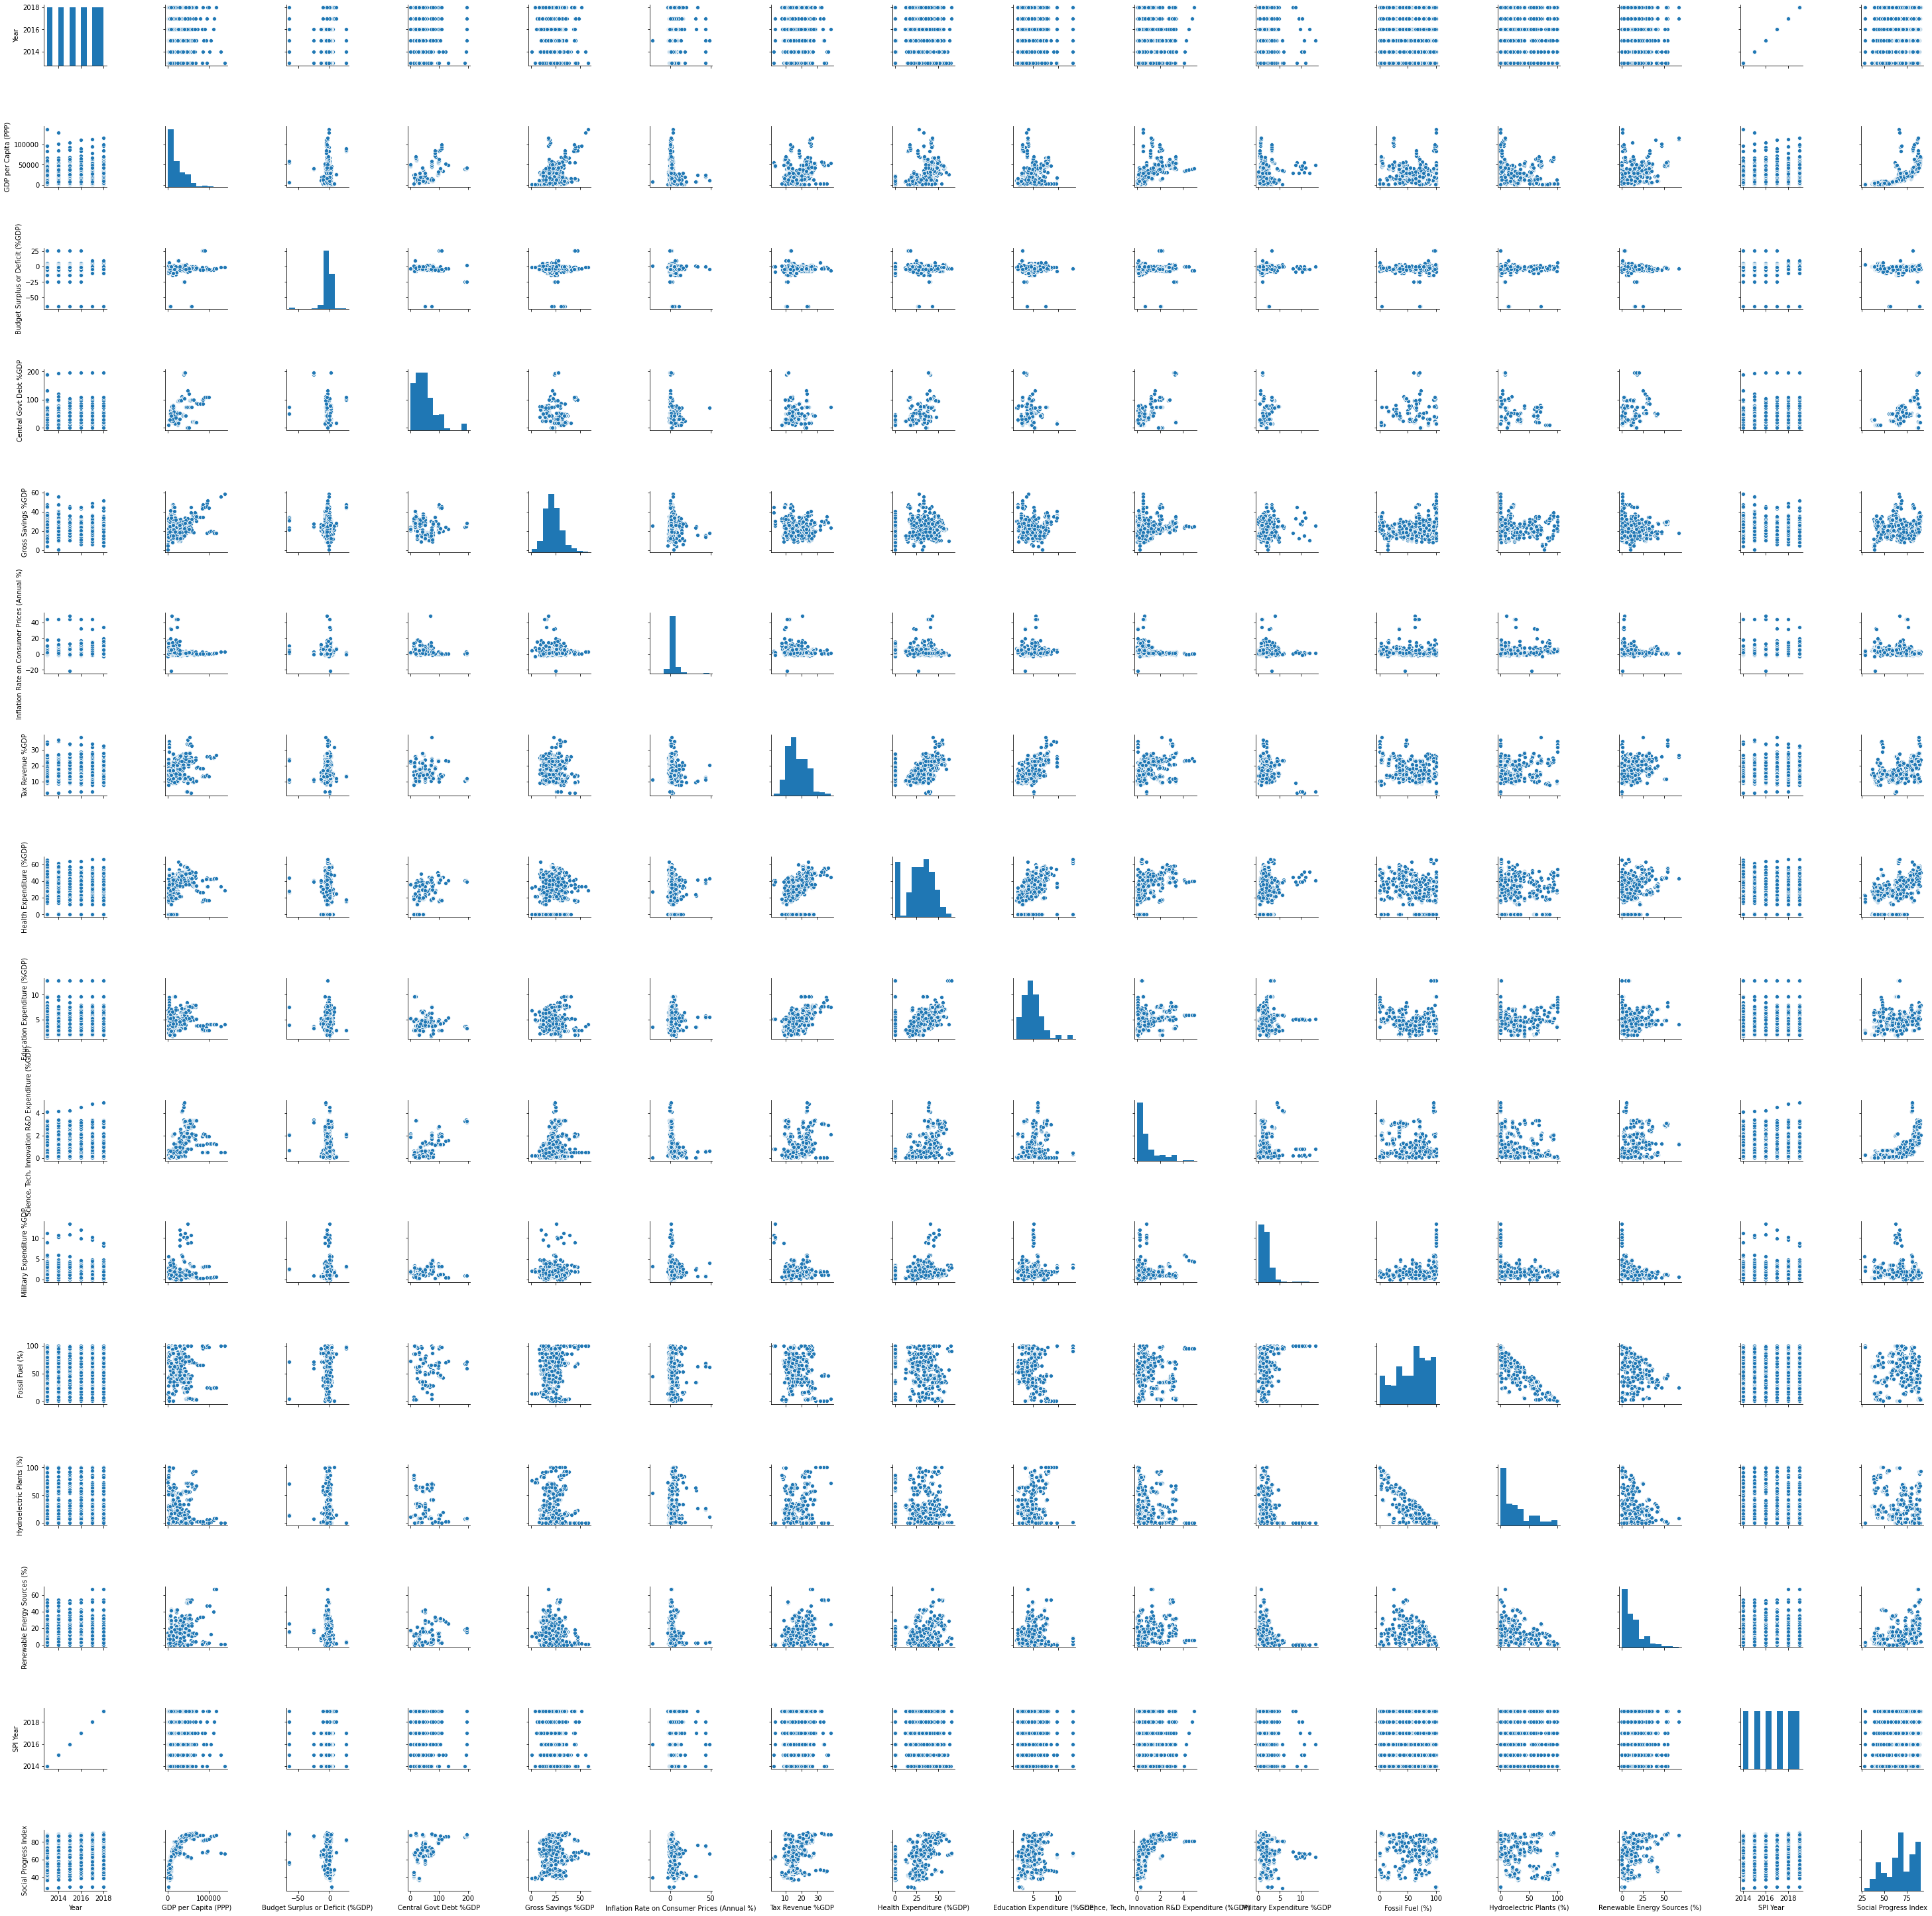

In [660]:
sns.pairplot(better_data)

##### 

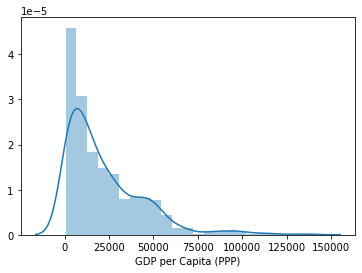

In [655]:
sns.distplot(better_data['GDP per Capita (PPP)'])

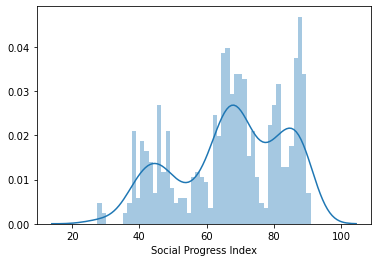

In [656]:
sns.distplot(better_data['Social Progress Index'], bins=50)

In [649]:
better_data.Country.unique().shape

(93,)

In [509]:
better_data.describe()

,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
count,666.000000,654.000000,666.000000,210.000000,636.000000,648.000000,564.000000,666.000000,666.000000,666.000000,654.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,2015.500000,21914.090623,-3.418058,49.819644,22.686361,3.593499,17.315654,28.337656,4.844966,0.826107,1.786243,57.479105,26.839359,12.598941,2016.500000,67.127327
std,1.709109,21645.051955,7.323243,37.731700,8.318499,5.611226,5.950424,16.370836,1.930890,0.910954,1.535530,28.336687,26.771046,12.194654,1.709109,15.698333
min,2013.000000,740.984231,-64.100000,0.038039,0.617073,-21.531694,2.733929,0.000018,1.621070,0.014190,0.000000,0.000000,0.000000,0.000000,2014.000000,27.490000
25%,2014.000000,5248.867747,-5.500000,23.183250,16.530525,0.883815,13.019459,19.640780,3.601900,0.210280,0.968798,35.950000,3.012500,2.510000,2015.000000,56.807500
50%,2015.500000,14683.625405,-2.850000,42.338959,21.870781,2.473032,16.206859,29.516092,4.737920,0.506385,1.447481,62.775000,18.812500,9.200000,2016.500000,68.340000
75%,2017.000000,31202.001171,-0.400000,71.690359,27.640049,4.767588,21.965169,40.322060,5.650415,1.166114,2.092095,80.000000,39.850000,18.190625,2018.000000,80.687500
max,2018.000000,138230.137308,25.600000,197.284423,58.252012,48.699865,37.933526,65.983521,12.837310,4.952780,13.325672,100.000000,100.000000,67.000000,2019.000000,90.950000


In [413]:
compiled_data.Year = compiled_data.Year.astype(int)

In [414]:
compiled_data

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Infrastructure Expenditure (%GDP),Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
0,Australia,AUS,2013,45902.047948,-3.2,0.038039,23.991137,2.449889,21.958111,1.587642,5.678,5.22974,2.17870,1.649533,72.225,10.9625,16.6625,2014,87.07
1,Austria,AUT,2013,47922.049121,-4.0,NaN,25.483818,2.000159,26.415173,0.624247,7.612,5.54711,2.95492,0.750825,20.800,67.2000,12.0000,2014,85.90
2,Belgium,BEL,2013,43671.119593,-7.8,NaN,24.233698,1.113096,26.190847,0.498238,8.028,6.63966,2.33393,1.010349,34.950,0.8125,34.5375,2014,86.24
3,Bulgaria,BGR,2013,16581.770588,-1.0,NaN,24.119427,0.890094,20.005318,1.154324,4.072,4.07685,0.63724,1.619230,46.000,21.0000,17.5000,2014,73.24
4,Canada,CAN,2013,44298.578734,-6.5,NaN,21.597369,0.938292,11.623505,1.016636,7.359,5.27444,1.70964,1.004858,23.825,55.1375,11.7750,2014,86.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,Slovenia,SVN,2018,38749.251982,-1.9,NaN,27.287842,1.738609,18.626998,0.508341,6.077,4.80289,1.94221,0.974192,34.400,34.0000,9.0000,2019,85.80
30,Spain,ESP,2018,40482.589010,-0.4,104.572915,22.312600,1.675068,14.248211,0.507923,6.331,4.20911,1.23700,1.273091,47.000,14.0000,32.0000,2019,87.47
31,Sweden,SWE,2018,53746.799169,-3.0,NaN,28.438431,1.953535,27.911031,0.751480,9.263,7.66993,3.33937,1.042914,5.000,42.0000,32.0000,2019,89.45
32,Switzerland,CHE,2018,69357.486055,-2.7,19.734914,34.678914,0.936313,10.080934,1.345506,7.647,5.11332,3.37286,0.675557,3.000,67.0000,13.0000,2019,89.89


In [424]:
compiled_data.isnull().sum().sort_values(ascending=False)

Central Govt Debt %GDP                              150
Tax Revenue %GDP                                      6
Military Expenditure %GDP                             6
Social Progress Index                                 0
Country Code                                          0
Year                                                  0
GDP per Capita (PPP)                                  0
Budget Surplus or Deficit (%GDP)                      0
Gross Savings %GDP                                    0
Inflation Rate on Consumer Prices (Annual %)          0
Infrastructure Expenditure (%GDP)                     0
SPI Year                                              0
Health Expenditure (%GDP)                             0
Education Expenditure (%GDP)                          0
Science, Tech, Innovation R&D Expenditure (%GDP)      0
Fossil Fuel (%)                                       0
Hydroelectric Plants (%)                              0
Renewable Energy Sources (%)                    

In [425]:
compiled_data[compiled_data['Tax Revenue %GDP'].isna()]

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Infrastructure Expenditure (%GDP),Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
28,Serbia,SRB,2013,14629.038309,-5.8,NaN,13.967964,7.694264,NaN,0.887137,4.792,4.045595,0.68367,2.020688,57.5,39.0,3.5,2014,70.33
28,Serbia,SRB,2014,14659.549111,-5.8,NaN,13.134236,2.082448,NaN,1.099049,4.792,3.926980,0.72309,2.065940,59.2,40.6,0.2,2015,70.72
28,Serbia,SRB,2015,14922.059909,-5.8,NaN,16.283422,1.392358,NaN,1.822099,4.792,3.789020,0.81146,1.948723,60.6,39.7,1.2,2016,70.28
28,Serbia,SRB,2016,15734.332888,-5.8,NaN,16.203766,1.122314,NaN,1.755661,4.792,3.640270,0.83951,1.854185,62.0,38.8,2.2,2017,71.75
28,Serbia,SRB,2017,16534.339083,-1.5,NaN,15.470524,3.131062,NaN,2.096927,4.792,3.715090,0.87353,1.959356,62.0,35.0,1.0,2018,71.66
28,Serbia,SRB,2018,17563.165365,-1.5,NaN,18.826350,1.959841,NaN,2.096927,4.792,3.715090,0.92132,1.906136,62.0,35.0,1.0,2019,71.59


In [426]:
compiled_data[compiled_data['Military Expenditure %GDP'].isna()]

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Central Govt Debt %GDP,Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Infrastructure Expenditure (%GDP),Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
14,Iceland,ISL,2013,44157.552122,-6.7,73.52783,17.717872,3.872279,21.970830,0.346561,6.597,7.49122,1.70204,NaN,4.05,71.2625,24.6625,2014,88.02
14,Iceland,ISL,2014,45714.792658,-6.7,73.52783,17.816870,2.044615,24.643602,0.338258,6.665,7.68856,1.94811,NaN,4.05,71.2625,24.6625,2015,88.06
14,Iceland,ISL,2015,48854.345442,-6.7,73.52783,20.145056,1.633056,22.855794,0.431115,6.572,7.53237,2.20315,NaN,4.20,71.7000,24.1000,2016,88.33
14,Iceland,ISL,2016,53025.439515,-6.7,73.52783,23.138303,1.696928,37.933526,0.399123,6.655,7.45988,2.11766,NaN,4.00,71.3500,24.5500,2017,88.46
14,Iceland,ISL,2017,55562.426622,-64.1,73.52783,23.279939,1.760416,24.156193,0.399123,6.830,7.45988,2.10444,NaN,4.00,71.0000,25.0000,2018,89.08
14,Iceland,ISL,2018,57742.150279,-64.1,73.52783,21.019102,2.682918,23.444905,0.399123,7.038,7.45988,2.02994,NaN,4.00,71.0000,25.0000,2019,89.29


In [427]:
compiled_data.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'China',
       'Croatia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'India', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey'],
      dtype=object)

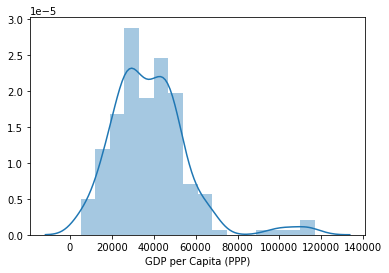

In [429]:
import seaborn as sns
sns.distplot(compiled_data['GDP per Capita (PPP)'])

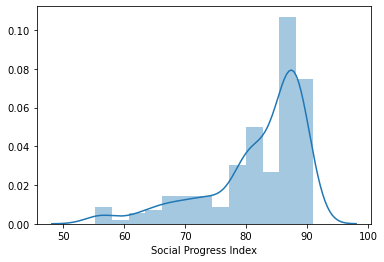

In [430]:
sns.distplot(compiled_data['Social Progress Index'])